# Project: Wrangling and Analyze Data



Project Steps Overview
Your tasks in this project are as follows:

Step 1: Gathering data

Step 2: Assessing data

Step 3: Cleaning data

Step 4: Storing data

Step 5: Analyzing, and visualizing data

Step 6: Reporting

your data wrangling efforts
your data analyses and visualizations

In [1]:
#importing all libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import requests
import tweepy 
import json
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [2]:
t_arch_orig = pd.read_csv('twitter-archive-enhanced.csv')

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [3]:
#Download tweet image predictions TSV using the Requests library and write it to image_predictions.tsv
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

#create file
with open('image_predictions.tsv', mode='wb') as file:
    file.write(response.content)
    
#create dataframe
img_pred_orig = pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [4]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = t_arch_orig.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print("Fail")
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
288: 838561493054533637
Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 8342

Fail
572: 801538201127157760
Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 7985

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990:

Fail
2231: 668237644992782336
Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264:

In [5]:
url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"
filename = "tweet-json.txt"

response = requests.get(url)

if response.status_code == 200:
    
    with open(filename, 'wb') as file:
        file.write(response.content)

In [6]:
# Read the tweet JSON data from the file
# Read the tweet JSON data from the file
with open(filename, 'r') as file:
    tweet_json_list = file.readlines()


# Create an empty list to store the extracted data
tweets_data = []

# Extract the required data from each tweet JSON
for tweet_json in tweet_json_list:
    tweet = json.loads(tweet_json)
    tweet_id = tweet['id']
    #compare later values from t_arch and here
    timestamp = tweet["created_at"]
    #compare later values from t_arch and here
    in_reply_to_status_id = tweet["in_reply_to_status_id"]
    #compare later values from t_arch and here
    in_reply_to_user_id = tweet['in_reply_to_user_id']
    retweeted_status_id = tweet.get("quoted_status_id")
    #i'm using tweet.get() because not all tweets has this attribute
    favorite_count = tweet['favorite_count']
    retweet_count = tweet['retweet_count']
   
    expanded_url = tweet.get('entities', {}).get('media', [{}])[0].get('expanded_url')



    
    # Append the extracted data to the list
    tweets_data.append({
        'tweet_id':tweet_id ,
        'timestamp':timestamp ,
        'in_reply_to_status_id':in_reply_to_status_id ,
        'in_reply_to_user_id':in_reply_to_user_id,
        'retweeted_status_id':retweeted_status_id,
        'favorite_count':favorite_count ,
        'retweet_count':retweet_count,
        
        "expanded_url":expanded_url
    })


# Create a dataframe from the extracted data
t_json_orig = pd.DataFrame(tweets_data)

## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



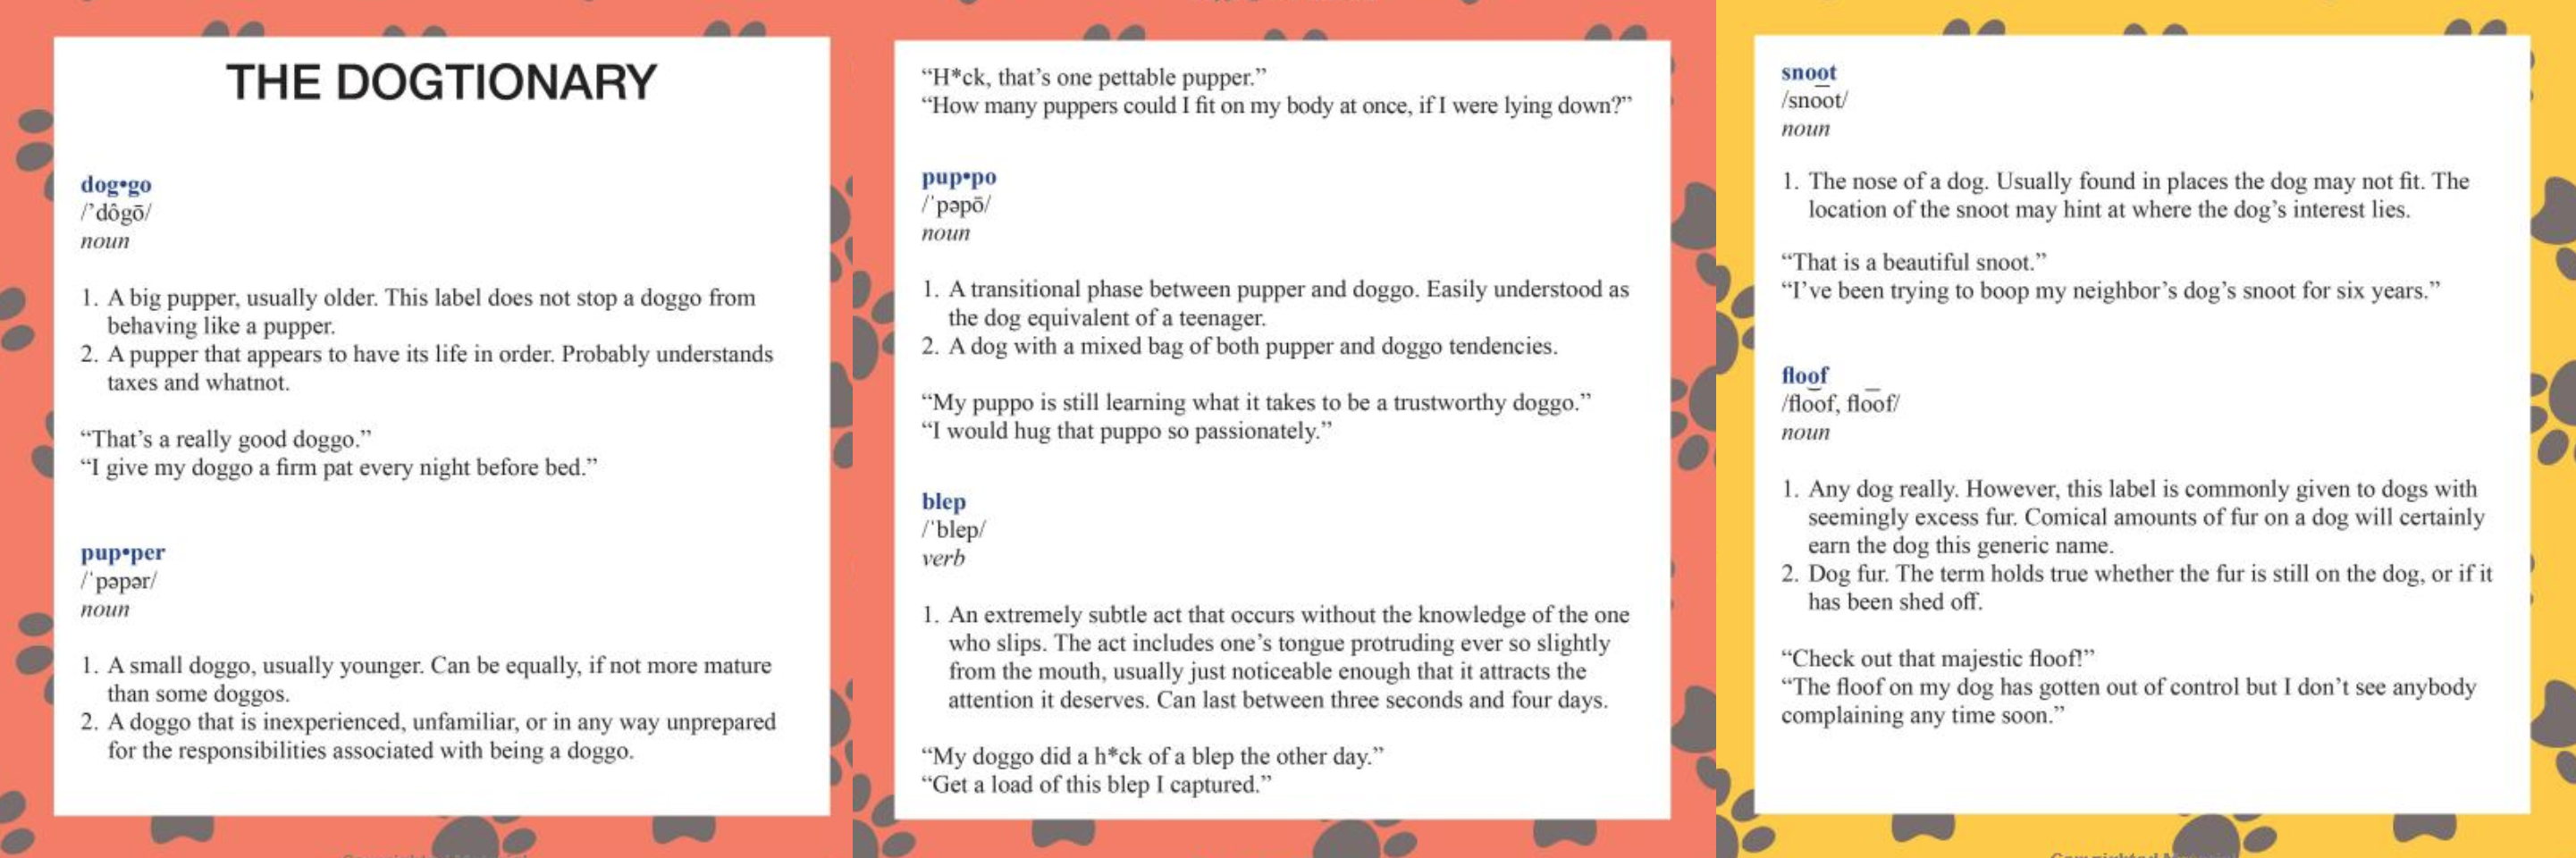
The Dogtionary explains the various stages of dog: doggo, pupper, puppo, and floof(er) (via the #WeRateDogs book on Amazon)

### Visual assessment

In [7]:
t_arch_orig

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None




<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - incorrect dog's names <br>
    - incorrect data type in timestamp column
    - source string contains HTML elements
    - if the text contains "We only rate dogs" that tweet should be excluded
</div>

<div class="alert alert-block alert-danger">
<b>Tidiness issues:</b> <br> 
    - unnecessary columns: doggo,floofer pupper,puppo
</div>

In [8]:
img_pred_orig

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - Underscore is used instead of whitespace in columns p1,p2,p3
</div>

In [9]:
t_json_orig

,tweet_id,timestamp,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,favorite_count,retweet_count,expanded_url
0,892420643555336193,Tue Aug 01 16:23:56 +0000 2017,NaN,NaN,NaN,39467,8853,https://twitter.com/dog_rates/status/892420643...
1,892177421306343426,Tue Aug 01 00:17:27 +0000 2017,NaN,NaN,NaN,33819,6514,https://twitter.com/dog_rates/status/892177421...
2,891815181378084864,Mon Jul 31 00:18:03 +0000 2017,NaN,NaN,NaN,25461,4328,https://twitter.com/dog_rates/status/891815181...
3,891689557279858688,Sun Jul 30 15:58:51 +0000 2017,NaN,NaN,NaN,42908,8964,https://twitter.com/dog_rates/status/891689557...
4,891327558926688256,Sat Jul 29 16:00:24 +0000 2017,NaN,NaN,NaN,41048,9774,https://twitter.com/dog_rates/status/891327558...
...,...,...,...,...,...,...,...,...
2349,666049248165822465,Mon Nov 16 00:24:50 +0000 2015,NaN,NaN,NaN,111,41,https://twitter.com/dog_rates/status/666049248...
2350,666044226329800704,Mon Nov 16 00:04:52 +0000 2015,NaN,NaN,NaN,311,147,https://twitter.com/dog_rates/status/666044226...
2351,666033412701032449,Sun Nov 15 23:21:54 +0000 2015,NaN,NaN,NaN,128,47,https://twitter.com/dog_rates/status/666033412...
2352,666029285002620928,Sun Nov 15 23:05:30 +0000 2015,NaN,NaN,NaN,132,48,https://twitter.com/dog_rates/status/666029285...



<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - incorrect data type in timestamp column <br>
    
</div>



### Programmatic assessement

In [10]:
t_arch_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 


<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - missing values in expanded_urls<br> 
    - incorrect data type in timestamp column,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,  retweeted_status_user_id, retweeted_status_timestamp<br>
    - non-null values in retweeted* columns indicates non-original tweets<br>
</div>

<div class="alert alert-block alert-danger">
<b>Tidiness issues:</b> <br> 
    - unnecessary columns: doggo,floofer pupper,puppo
</div>


In [11]:
img_pred_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - dataset doesn't have information for ~300 tweet ids <br>
    
</div>



In [12]:
t_json_orig.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2354 non-null   int64  
 1   timestamp              2354 non-null   object 
 2   in_reply_to_status_id  78 non-null     float64
 3   in_reply_to_user_id    78 non-null     float64
 4   retweeted_status_id    29 non-null     float64
 5   favorite_count         2354 non-null   int64  
 6   retweet_count          2354 non-null   int64  
 7   expanded_url           2073 non-null   object 
dtypes: float64(3), int64(3), object(2)
memory usage: 147.2+ KB



<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - non-null values in retweeted* columns indicates non-original tweets<br>
    - incorrect data types in in_reply_to_status_id_json, in_reply_to_user_id_json, retweeted_status_id_json columns<br>
    
</div>


In [13]:
t_arch_orig['tweet_id'].duplicated().sum()

0


<div class="alert alert-block alert-success">
no duplicates indications
</div>

In [14]:
img_pred_orig['tweet_id'].duplicated().sum()

0

<div class="alert alert-block alert-success">
no duplicates indications
</div>

In [15]:
t_json_orig['tweet_id'].duplicated().sum()

0

<div class="alert alert-block alert-success">
no duplicates indications
</div>

Checking if t_arch contains the same values as t_json in the columns:`'in_reply_to_status_id'`, `'in_reply_to_user_id'`, `'retweeted_status_id'`

In [16]:
#merge right because t_json contains only existing tweets. no tweet = no metadata
#creating subsets and merging them by tweet id key
m_df = t_arch_orig[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id']].merge(t_json_orig[['tweet_id','in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id']], on='tweet_id', how='right')
#Checking the result
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2354 entries, 0 to 2353
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 2354 non-null   int64  
 1   in_reply_to_status_id_x  78 non-null     float64
 2   in_reply_to_user_id_x    78 non-null     float64
 3   retweeted_status_id_x    179 non-null    float64
 4   in_reply_to_status_id_y  78 non-null     float64
 5   in_reply_to_user_id_y    78 non-null     float64
 6   retweeted_status_id_y    29 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 147.1 KB


In [17]:
#we need only rows with values excluding rows ONLY when they have missing values in all columns except tweet_id
m_df = m_df.dropna(subset=m_df.columns[1:], how='all')

m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 285 entries, 29 to 2296
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   tweet_id                 285 non-null    int64  
 1   in_reply_to_status_id_x  78 non-null     float64
 2   in_reply_to_user_id_x    78 non-null     float64
 3   retweeted_status_id_x    179 non-null    float64
 4   in_reply_to_status_id_y  78 non-null     float64
 5   in_reply_to_user_id_y    78 non-null     float64
 6   retweeted_status_id_y    29 non-null     float64
dtypes: float64(6), int64(1)
memory usage: 17.8 KB


In [18]:
#Checking if all these replies belong to the same ids
selected_rows = m_df[['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'in_reply_to_status_id_y', 'in_reply_to_user_id_y']][m_df[['in_reply_to_status_id_x', 'in_reply_to_user_id_x', 'in_reply_to_status_id_y', 'in_reply_to_user_id_y']].notnull()].dropna()
selected_rows

,in_reply_to_status_id_x,in_reply_to_user_id_x,in_reply_to_status_id_y,in_reply_to_user_id_y
29,8.862664e+17,2.281182e+09,8.862664e+17,2.281182e+09
54,8.816070e+17,4.738443e+07,8.816070e+17,4.738443e+07
63,8.795538e+17,3.105441e+09,8.795538e+17,3.105441e+09
112,8.707262e+17,1.648776e+07,8.707262e+17,1.648776e+07
147,8.634256e+17,7.759620e+07,8.634256e+17,7.759620e+07
...,...,...,...,...
2036,6.715449e+17,4.196984e+09,6.715449e+17,4.196984e+09
2147,6.693544e+17,4.196984e+09,6.693544e+17,4.196984e+09
2167,6.678065e+17,4.196984e+09,6.678065e+17,4.196984e+09
2187,6.689207e+17,2.143566e+07,6.689207e+17,2.143566e+07


<div class="alert alert-block alert-success">
all these replies belong to the same ids
</div>

In [19]:
#selecting rows wrom column retweeted_status_id to see if t_arch dataset has accurate metadata for tweets
selected_rows = m_df[['tweet_id', 'retweeted_status_id_x', 'retweeted_status_id_y']][(m_df['retweeted_status_id_x'].notnull()) | (m_df['retweeted_status_id_y'].notnull())]
selected_rows[['tweet_id','retweeted_status_id_x', 'retweeted_status_id_y']]

,tweet_id,retweeted_status_id_x,retweeted_status_id_y
31,886054160059072513,8.860537e+17,8.860534e+17
34,885518971528720385,NaN,8.855174e+17
35,885311592912609280,8.305833e+17,NaN
41,884247878851493888,NaN,8.839657e+17
67,879130579576475649,8.780576e+17,NaN
...,...,...,...
1235,712309440758808576,NaN,7.099191e+17
1240,711998809858043904,7.119983e+17,NaN
1322,706169069255446529,NaN,7.061659e+17
2257,667550904950915073,6.675487e+17,NaN


<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - t_arch dataset has inaccurate data in the retweeted_status_id column
</div>

In [20]:
t_arch_orig['rating_denominator'].value_counts()

10     2333
11        3
50        3
20        2
80        2
70        1
7         1
15        1
150       1
170       1
0         1
90        1
40        1
130       1
110       1
16        1
120       1
2         1
Name: rating_denominator, dtype: int64

<div class="alert alert-block alert-danger">
<b>Quality issues:</b> <br> 
    - t_arch dataset has inaccurate data in the rating_denominator column
</div>

### Issues

<center>Quality issues</center>

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id_json, in_reply_to_user_id_json... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column                                |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column 



<center>Tidiness issues</center>


| check | Dataset           | Issue                                                             |
|:-----:|:------------------|:------------------------------------------------------------------|
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span> | t_arch_orig       | unnecessary columns: doggo, floofer, pupper, puppo                 |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span> | t_json_orig, t_arch_orig, img_pred_orig | unify all 3 datasets into one, eliminate repeated columns         |



## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).



In [21]:
# Make copies of original pieces of data
t_json = t_json_orig.copy()
t_arch = t_arch_orig.copy()
img_pred = img_pred_orig.copy()

### Quality Issue #1:

#### Define: Extracting text from HTML object into the `source` column

Using Beautiful Soup library create a source_cleaning(html_str) function with input "_html obj_" and output "_source_":

#### Code

In [22]:
from bs4 import BeautifulSoup

# Example string
test = "<a href=\"http://twitter.com\" rel=\"nofollow\">Twitter Web Client</a>"

def source_cleaning(html_str):
    soup = BeautifulSoup(html_str, 'html.parser')
    return soup.get_text()

#### Test

In [23]:
source_cleaning(test)

'Twitter Web Client'

#### Apply:

In [24]:
t_arch['source'] = t_arch['source'].apply(source_cleaning)

#### Check:

In [25]:
t_arch['source'].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'Vine - Make a Scene',
       'TweetDeck'], dtype=object)

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id_json, in_reply_to_user_id_json... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column  |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column 

### Quality Issue #2:

#### Define: Incorrect dog's names



#### Code

In [26]:
import re

# Example string
text = "This is an East African Chalupa Seal. We only rate dogs. Please only send in dogs. Thank you... 10/10 https://t.co/iHe6liLwWR"
text1 = "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU"
def dogs_name(text):
    pattern = r"(?:This is|name is)\s+([A-Z][a-z]+)(?!\s+[A-Z][a-z]+)"
    name = re.findall(pattern, text)
    if name:
        return name[0]
    else:
        return np.nan

#### Test

In [27]:
dogs_name(text)


nan

In [28]:
dogs_name(text1)

'Phineas'

#### Apply:

In [29]:
t_arch['name'] = t_arch['text'].apply(dogs_name)

#### Check:

In [30]:
t_arch['name'].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', nan, 'Zoey',
       'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim',
       'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'Maya', 'Mingus',
       'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Howard', 'Lilly',
       'Earl', 'Lola', 'Kevin', 'Noah', 'Bella', 'Rusty', 'Gus',
       'Stanley', 'Alfy', 'Koko', 'Rey', 'Gary', 'Louis', 'Romeo',
       'Bailey', 'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy',
       'Aja', 'Penny', 'Nelly', 'Ginger', 'Benedict', 'Goose', 'Coco',
       'Jed', 'Sebastian', 'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody',
       'Rover', 'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Dewey',
       'Scout', 'Gizmo', 'Shikha', 'Jamesy', 'Lili', 'Sammy', 'Meatball',
       'Paisley', 'Albus', 'Neptune', 'Belle', 'Zooey', 'Dave', 'Jersey',
       'Hobbes', 'Burt', 'Carl', 'Jordy', 'Sophie', 'Wyatt', 'Rosie',
       'Oscar', 'Luna', 'Callie', 'Cermet', 'Marlee', 'Arya', 'Einstein

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id_json, in_reply_to_user_id_json... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column 

### Quality Issue #3:

#### Define: No dog_stage column

#### Code

In [31]:
# Example string
text ="This is Meera. She just heard about taxes and how much a doghouse in a nice area costs. Not pupared to be a  puppo anymore. 12/10 https://t.co/GZmNEdyoJY"
#P.S _cat means category
def dog_stage_cat(text):
    if 'doggo' in text.lower():
        return 'doggo'
    elif 'doggos' in text.lower():
        return 'doggo'

    elif  'pupper'in text.lower():
        return 'pupper'
    elif  'puppers'in text.lower():
        return 'pupper'
    
    elif 'puppo'  in text.lower():
        return 'puppo'
    elif 'puppos' in text.lower():
        return 'puppo'
    
    elif 'blep'  in text.lower():
        return 'blep'
    elif 'bleps' in text.lower():
        return 'blep'
    
    elif 'snoot'  in text.lower():
        return 'snoot'
    elif  'snoots' in text.lower():
        return 'snoot'
    
    elif 'floof' in text.lower():
        return 'floof'
    elif 'floofs' in text.lower():
        return 'floof'
    else:
        return np.nan

#### Test

In [32]:
text =  "IT'S PUPPERGEDDON. Total of 144/120 ...I think https://t.co/ZanVtAtvIq"
dog_stage_cat(text)

'pupper'

#### Apply:

In [33]:
t_arch['dog_stage'] = t_arch['text'].apply(dog_stage_cat)

#### Check:

In [34]:
t_arch['dog_stage'].unique()

array([nan, 'doggo', 'puppo', 'floof', 'pupper', 'blep'], dtype=object)

In [35]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        1171 non-null   object 
 13  doggo                       2356 

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id_json, in_reply_to_user_id_json... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column 

### Quality Issue #4:

#### Define: 	If the text contains "We only rate dogs" that tweet should be excluded

#### Code

In [36]:
t_arch = t_arch[~t_arch['text'].str.contains('We only rate dogs')]


#### Check

In [37]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2300 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2300 non-null   object 
 4   source                      2300 non-null   object 
 5   text                        2300 non-null   object 
 6   retweeted_status_id         173 non-null    float64
 7   retweeted_status_user_id    173 non-null    float64
 8   retweeted_status_timestamp  173 non-null    object 
 9   expanded_urls               2241 non-null   object 
 10  rating_numerator            2300 non-null   int64  
 11  rating_denominator          2300 non-null   int64  
 12  name                        1171 non-null   object 
 13  doggo                       2300 

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id_json, in_reply_to_user_id_json... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column 

### Quality Issues #14 & #15:

#### Define: Inaccurate data in the retweeted_status_id column and Inaccurate data in the rating_denominator column

#### Code

In [38]:
#first, I need to create a column rating and put here strings that contain rating

def extract_rating(text):
    # Regular expression pattern
    pattern = r'\d+(\.\d+)?/\d+'

    # Find the first match in the text
    match = re.search(pattern, text)

    # Return the extracted rating
    if match:
        return match.group()
    else:
        return np.nan

#### Test

In [39]:
text = "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10"
text1= "This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 13/10"

In [40]:
extract_rating(text)

'9.75/10'

In [41]:
extract_rating(text1)

'13/10'

#### Apply

In [42]:
#t_arch["rating"] = t_arch["text"].apply(extract_rating)
t_arch["rating"] = t_arch["text"].apply(extract_rating)



In [43]:
t_arch["rating"].unique()

array(['13/10', '12/10', '14/10', '13.5/10', '17/10', '11/10', '10/10',
       '420/10', '666/10', '6/10', '15/10', '182/10', '960/00', '0/10',
       '9.75/10', '11/15', '007/10', '84/70', '7/10', '9/10', '24/7',
       '8/10', '1/10', '5/10', '11.27/10', '3/10', '9/11', '4/10',
       '165/150', '1776/10', '204/170', '4/20', '50/50', '99/90', '80/80',
       '45/50', '60/50', '44/40', '143/130', '121/110', '7/11', '20/16',
       '9.5/10', '11.26/10', '2/10', '144/120', '88/80', '1/2'],
      dtype=object)

#### Check

In [44]:
filtered_rows= t_arch[t_arch["rating"].str.split("/", expand=True)[1] != "10"]
#filtered_rows[['text','rating']]
text_values = filtered_rows['text'].tolist()
text_values

["@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",
 '@docmisterio account started on 11/15/15',
 'The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd',
 'Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx',
 'RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…',
 'Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE',
 'After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ',
 'Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv',
 'Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a',
 'This

- '11/15' replace with nan
- 960/00 replace with 13/10
- 9/11 replace with 14/10
- 24/7 replace with nan
- 84/70 replace with 12/10
- 165/150 replace with 11/10
- 204/170 replace with 12/10
- 4/20 replace with 13/10
- 50/50 replace with 11/10
- 80/80 replace with 10/10
- 99/90 replace with 11/10
- 45/50 replace with 9/10
- 60/50 replace with 12/10
- 44/40 replace with 11/10
- 4/20 replace with 2/10
- 143 replace with 11/10
- 121/110 replace with 11/10
- 7/11 replace with 10/10
- 20/16 replace with 12.5/10
- 144/120 replace with 12/10
- 88/80 replace with 11/10
- 1/2 replace with 9/10
- 007/10 replace with 0.07/10
- 0/10 replace with nan


In [45]:
replacements = {
    '11/15': np.nan,
    '960/00': '13/10',
    '9/11': '14/10',
    '24/7': np.nan,
    '84/70': '12/10',
    '165/150': '11/10',
    '204/170': '12/10',
    '4/20': '13/10',
    '50/50': '11/10',
    '80/80': '10/10',
    '99/90': '11/10',
    '45/50': '9/10',
    '60/50': '12/10',
    '44/40': '11/10',
    '4/20': '2/10',
    '143/130': '11/10',
    '121/110': '11/10',
    '7/11': '10/10',
    '20/16': '12.5/10',
    '144/120': '12/10',
    '88/80': '11/10',
    '1/2': '9/10',
    '007/10': '0.07/10',
    '0/10':np.nan
}

t_arch['rating'] = t_arch['rating'].replace(replacements)

In [46]:
t_arch["rating"].unique()

array(['13/10', '12/10', '14/10', '13.5/10', '17/10', '11/10', '10/10',
       '420/10', '666/10', '6/10', '15/10', '182/10', nan, '9.75/10',
       '0.07/10', '7/10', '9/10', '8/10', '1/10', '5/10', '11.27/10',
       '3/10', '4/10', '1776/10', '2/10', '12.5/10', '9.5/10', '11.26/10'],
      dtype=object)

#### Code

In [47]:
#take a string and the split return a tuple with first value for nomunator and a second value for denominator
def extract_numerator_denominator(string):
    if pd.isna(string):
        return np.nan, np.nan
    numerator, denominator = string.split('/')
    return float(numerator), int(denominator)

#### Test

In [48]:
string = '11.26/10'
extract_numerator_denominator(string)

(11.26, 10)

#### Apply:

In [49]:
t_arch[['rating_numerator','rating_denominator' ]] = t_arch['rating'].apply(extract_numerator_denominator).apply(pd.Series)

#### Check:

In [50]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2300 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2300 non-null   object 
 4   source                      2300 non-null   object 
 5   text                        2300 non-null   object 
 6   retweeted_status_id         173 non-null    float64
 7   retweeted_status_user_id    173 non-null    float64
 8   retweeted_status_timestamp  173 non-null    object 
 9   expanded_urls               2241 non-null   object 
 10  rating_numerator            2296 non-null   float64
 11  rating_denominator          2296 non-null   float64
 12  name                        1171 non-null   object 
 13  doggo                       2300 

In [51]:
t_arch['rating_denominator'] = t_arch['rating_denominator'].astype(pd.Int64Dtype())

In [52]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2300 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2300 non-null   object 
 4   source                      2300 non-null   object 
 5   text                        2300 non-null   object 
 6   retweeted_status_id         173 non-null    float64
 7   retweeted_status_user_id    173 non-null    float64
 8   retweeted_status_timestamp  173 non-null    object 
 9   expanded_urls               2241 non-null   object 
 10  rating_numerator            2296 non-null   float64
 11  rating_denominator          2296 non-null   Int64  
 12  name                        1171 non-null   object 
 13  doggo                       2300 

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id, in_reply_to_user_id... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_nominator column 

### Quality Issues #5, #6, #8, and #12:

#### Define:Incorrect data types

#### Code


#### Apply:
I need to corrrect the data types for:
- on t_arch:
    - in_reply_to_status_id       to int
    - in_reply_to_user_id         to int
    - timestamp                   to timestamp
    - retweeted_status_id         to int
    - retweeted_status_user_id    to int
    - retweeted_status_timestamp to timestamp

- in t_json:
    - in_reply_to_status_id  to int
    - in_reply_to_user_id    to int
    - retweeted_status_id    to int


In [53]:
t_arch['in_reply_to_status_id'] = t_arch['in_reply_to_status_id'].astype(pd.Int64Dtype())
t_arch['in_reply_to_user_id'] = t_arch['in_reply_to_user_id'].astype(pd.Int64Dtype())
t_arch['retweeted_status_id'] = t_arch['retweeted_status_id'].astype(pd.Int64Dtype())
t_arch['retweeted_status_user_id'] = t_arch['retweeted_status_user_id'].astype(pd.Int64Dtype())
t_json['in_reply_to_status_id'] = t_json['in_reply_to_status_id'].astype(pd.Int64Dtype())
t_json['in_reply_to_user_id'] = t_json['in_reply_to_user_id'].astype(pd.Int64Dtype())
t_json['retweeted_status_id'] = t_json['retweeted_status_id'].astype(pd.Int64Dtype())

t_arch['timestamp'] = pd.to_datetime(t_arch['timestamp'])
t_arch['retweeted_status_timestamp'] = pd.to_datetime(t_arch['retweeted_status_timestamp'])


#### Check

In [54]:
t_arch.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2300 entries, 0 to 2355
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2300 non-null   int64              
 1   in_reply_to_status_id       78 non-null     Int64              
 2   in_reply_to_user_id         78 non-null     Int64              
 3   timestamp                   2300 non-null   datetime64[ns, UTC]
 4   source                      2300 non-null   object             
 5   text                        2300 non-null   object             
 6   retweeted_status_id         173 non-null    Int64              
 7   retweeted_status_user_id    173 non-null    Int64              
 8   retweeted_status_timestamp  173 non-null    datetime64[ns, UTC]
 9   expanded_urls               2241 non-null   object             
 10  rating_numerator            2296 non-null   float64         

In [55]:
t_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   tweet_id               2354 non-null   int64 
 1   timestamp              2354 non-null   object
 2   in_reply_to_status_id  78 non-null     Int64 
 3   in_reply_to_user_id    78 non-null     Int64 
 4   retweeted_status_id    29 non-null     Int64 
 5   favorite_count         2354 non-null   int64 
 6   retweet_count          2354 non-null   int64 
 7   expanded_url           2073 non-null   object
dtypes: Int64(3), int64(3), object(2)
memory usage: 154.1+ KB


| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id, in_reply_to_user_id... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_nominator column 

### Quality Issue #11:

#### Define:Underscore is used instead of whitespace p1, p2, p3(img_pred)

#### Code

In [56]:
#make a string in lower case and then replace "_" with " "
img_pred[['p1', 'p2', 'p3']] = img_pred[['p1', 'p2', 'p3']].apply(lambda x: x.str.lower().str.replace("_", " "))

#### Check

In [57]:
img_pred['p1'].unique()

array(['welsh springer spaniel', 'redbone', 'german shepherd',
       'rhodesian ridgeback', 'miniature pinscher',
       'bernese mountain dog', 'box turtle', 'chow', 'shopping cart',
       'miniature poodle', 'golden retriever', 'gordon setter',
       'walker hound', 'pug', 'bloodhound', 'lhasa', 'english setter',
       'hen', 'desktop computer', 'italian greyhound', 'maltese dog',
       'three-toed sloth', 'ox', 'malamute', 'guinea pig',
       'soft-coated wheaten terrier', 'chihuahua',
       'black-and-tan coonhound', 'coho', 'toy terrier',
       'blenheim spaniel', 'pembroke', 'llama',
       'chesapeake bay retriever', 'curly-coated retriever', 'dalmatian',
       'ibizan hound', 'border collie', 'labrador retriever', 'seat belt',
       'snail', 'miniature schnauzer', 'airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw puzzle', 'west highland white terrier',
       'toy poodle', 'giant schnauzer', 'vizsla', 'vacuum', 'rottweiler',
       'siberian husky', 't

In [58]:
img_pred['p2'].unique()

array(['collie', 'miniature pinscher', 'malinois', 'redbone',
       'rottweiler', 'english springer', 'mud turtle', 'tibetan mastiff',
       'shopping basket', 'komondor', 'yorkshire terrier',
       'english foxhound', 'bull mastiff', 'german shepherd', 'shih-tzu',
       'newfoundland', 'cock', 'desk', 'toy terrier', 'toy poodle',
       'otter', 'chesapeake bay retriever', 'siberian husky', 'skunk',
       'afghan hound', 'bloodhound', 'barracouta', 'papillon',
       'cocker spaniel', 'chow', 'irish terrier', 'chain saw', 'beagle',
       'giant schnauzer', 'labrador retriever', 'pembroke', 'chihuahua',
       'weimaraner', 'slug', 'brittany spaniel', 'standard schnauzer',
       'teddy', 'armadillo', 'african hunting dog', 'vizsla', 'doormat',
       'pug', 'italian greyhound', 'samoyed', 'pomeranian',
       'miniature poodle', 'lakeland terrier', 'irish setter', 'swab',
       'malamute', 'bath towel', 'border collie', 'leonberg', 'drake',
       'french bulldog', 'ice bear', 

In [59]:
img_pred['p3'].unique()

array(['shetland sheepdog', 'rhodesian ridgeback', 'bloodhound',
       'miniature pinscher', 'doberman', 'greater swiss mountain dog',
       'terrapin', 'fur coat', 'golden retriever',
       'soft-coated wheaten terrier', 'labrador retriever', 'pekinese',
       'ibizan hound', 'french bulldog', 'malinois', 'dandie dinmont',
       'borzoi', 'partridge', 'bookcase', 'basenji', 'miniature poodle',
       'great grey owl', 'groenendael', 'eskimo dog', 'hamster', 'briard',
       'papillon', 'flat-coated retriever', 'gar', 'chihuahua',
       'shih-tzu', 'pomeranian', 'dingo', 'power drill', 'saluki',
       'great pyrenees', 'west highland white terrier', 'collie',
       'toy poodle', 'vizsla', 'acorn', 'giant schnauzer', 'teddy',
       'common iguana', 'wig', 'water buffalo', 'coyote', 'seat belt',
       'kelpie', 'space heater', 'brabancon griffon', 'standard poodle',
       'beagle', 'irish water spaniel', 'bluetick', 'weimaraner',
       'chesapeake bay retriever', 'toilet tiss

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id, in_reply_to_user_id... |
| <span style="border: 2px solid green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_nominator column 

### Tidiness Issues #1 and #2:

#### Define:3 separate datasets, unnecessary columns. 

Datasets should be merged using inner merge with tweet_id as a key. Drining that merge all unnecessary columns should be excluded.

#### Code

In [289]:
#for fut ref: x:t_arch, y:img_pred,z:t_json

#triple inner merge
t_arch_master = t_arch[['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', \
                       'source', 'text', 'rating_numerator', 'rating_denominator', 'name', \
                       'dog_stage']].merge(img_pred, on='tweet_id', how='inner').merge(t_json[['tweet_id', \
                       'retweeted_status_id', 'favorite_count', 'retweet_count', 'expanded_url']], \
                       on='tweet_id', how='inner')

t_arch_master.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2022 entries, 0 to 2021
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2022 non-null   int64              
 1   in_reply_to_status_id  23 non-null     Int64              
 2   in_reply_to_user_id    23 non-null     Int64              
 3   timestamp              2022 non-null   datetime64[ns, UTC]
 4   source                 2022 non-null   object             
 5   text                   2022 non-null   object             
 6   rating_numerator       2019 non-null   float64            
 7   rating_denominator     2019 non-null   Int64              
 8   name                   1088 non-null   object             
 9   dog_stage              384 non-null    object             
 10  jpg_url                2022 non-null   object             
 11  img_num                2022 non-null   int64            

In [290]:
#drop rows without dog rating
t_arch_master.dropna(subset=['rating_numerator', 'rating_denominator'], inplace=True)
t_arch_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2019 entries, 0 to 2021
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2019 non-null   int64              
 1   in_reply_to_status_id  22 non-null     Int64              
 2   in_reply_to_user_id    22 non-null     Int64              
 3   timestamp              2019 non-null   datetime64[ns, UTC]
 4   source                 2019 non-null   object             
 5   text                   2019 non-null   object             
 6   rating_numerator       2019 non-null   float64            
 7   rating_denominator     2019 non-null   Int64              
 8   name                   1088 non-null   object             
 9   dog_stage              384 non-null    object             
 10  jpg_url                2019 non-null   object             
 11  img_num                2019 non-null   int64            

### Quality Issue #7, #9, #10, and #13:

#### Define:missing data and retweets

Since inner merge eliminated all missing IDs and retweets as well, we can drop columns retweeted_status_id, in_reply_to_status_id, and in_reply_to_user_id.

#### Code

In [295]:
t_arch_master = t_arch_master[t_arch_master[['in_reply_to_status_id', 'in_reply_to_user_id']].isnull().any(axis=1)]

t_arch_master.drop(columns=['retweeted_status_id', 'in_reply_to_status_id', 'in_reply_to_user_id'], inplace=True)


#### Check:

In [296]:
t_arch_master.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 2021
Data columns (total 22 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1997 non-null   int64              
 1   timestamp           1997 non-null   datetime64[ns, UTC]
 2   source              1997 non-null   object             
 3   text                1997 non-null   object             
 4   rating_numerator    1997 non-null   float64            
 5   rating_denominator  1997 non-null   Int64              
 6   name                1087 non-null   object             
 7   dog_stage           380 non-null    object             
 8   jpg_url             1997 non-null   object             
 9   img_num             1997 non-null   int64              
 10  p1                  1997 non-null   object             
 11  p1_conf             1997 non-null   float64            
 12  p1_dog              1997 non-null 

| check | Dataset      | Issue                                                                            |
|:-----:|:-------------|:---------------------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | source string contains HTML elements                                            |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect dog's names                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | No dog_stage column                                                           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | If the text contains "We only rate dogs" that tweet should be excluded           |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column                                         |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | t_json_orig  | Incorrect data type in timestamp column                                         |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Missing values in expanded_urls, quantity of missing values differ from t_json   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data type in timestamp column, in_reply_to_status_id, ...              |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Non-null values in retweeted* columns indicate non-original tweets              |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>  | img_pred_orig| Dataset doesn't have information for ~300 tweet ids                              |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | img_pred_orig| Underscore is used instead of whitespace p1, p2, p3                             |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Incorrect data types in in_reply_to_status_id, in_reply_to_user_id... |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the retweeted_status_id column                               |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_denominator column   |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span>   | t_arch_orig  | Inaccurate data in the rating_nominator column 




| check | Dataset           | Issue                                                             |
|:-----:|:------------------|:------------------------------------------------------------------|
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span> | t_arch_orig       | unnecessary columns                 |
| <span style="color: green; background-color: green; border-radius: 50%; display: inline-block; width: 20px; height: 20px;"></span> | t_json_orig, t_arch_orig, img_pred_orig | unify all 3 datasets into one, eliminate repeated columns         |


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [297]:
t_arch_master.to_csv('twitter_archive_master.csv', index=False)

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [298]:
#excluding columns we dont need for analysis
df = t_arch_master[['tweet_id', 'source','timestamp', 'rating_numerator',\
                   'rating_denominator', 'name', 'dog_stage',  'p1', \
                   'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', \
                   'p3', 'p3_conf','p3_dog', 'favorite_count', 'retweet_count']]


In [299]:
df.head(30)

,tweet_id,source,timestamp,rating_numerator,rating_denominator,name,dog_stage,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count
0,892420643555336193,Twitter for iPhone,2017-08-01 16:23:56+00:00,13.0,10,Phineas,NaN,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False,39467,8853
1,892177421306343426,Twitter for iPhone,2017-08-01 00:17:27+00:00,13.0,10,Tilly,NaN,chihuahua,0.323581,True,pekinese,0.090647,True,papillon,0.068957,True,33819,6514
2,891815181378084864,Twitter for iPhone,2017-07-31 00:18:03+00:00,12.0,10,Archie,NaN,chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True,25461,4328
3,891689557279858688,Twitter for iPhone,2017-07-30 15:58:51+00:00,13.0,10,Darla,NaN,paper towel,0.170278,False,labrador retriever,0.168086,True,spatula,0.040836,False,42908,8964
4,891327558926688256,Twitter for iPhone,2017-07-29 16:00:24+00:00,12.0,10,Franklin,NaN,basset,0.555712,True,english springer,0.225770,True,german short-haired pointer,0.175219,True,41048,9774
5,891087950875897856,Twitter for iPhone,2017-07-29 00:08:17+00:00,13.0,10,NaN,NaN,chesapeake bay retriever,0.425595,True,irish terrier,0.116317,True,indian elephant,0.076902,False,20562,3261
6,890971913173991426,Twitter for iPhone,2017-07-28 16:27:12+00:00,13.0,10,NaN,NaN,appenzeller,0.341703,True,border collie,0.199287,True,ice lolly,0.193548,False,12041,2158
7,890729181411237888,Twitter for iPhone,2017-07-28 00:22:40+00:00,13.0,10,NaN,NaN,pomeranian,0.566142,True,eskimo dog,0.178406,True,pembroke,0.076507,True,56848,16716
8,890609185150312448,Twitter for iPhone,2017-07-27 16:25:51+00:00,13.0,10,Zoey,NaN,irish terrier,0.487574,True,irish setter,0.193054,True,chesapeake bay retriever,0.118184,True,28226,4429
9,890240255349198849,Twitter for iPhone,2017-07-26 15:59:51+00:00,14.0,10,Cassie,doggo,pembroke,0.511319,True,cardigan,0.451038,True,chihuahua,0.029248,True,32467,7711


In [300]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1997 entries, 0 to 2021
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            1997 non-null   int64              
 1   source              1997 non-null   object             
 2   timestamp           1997 non-null   datetime64[ns, UTC]
 3   rating_numerator    1997 non-null   float64            
 4   rating_denominator  1997 non-null   Int64              
 5   name                1087 non-null   object             
 6   dog_stage           380 non-null    object             
 7   p1                  1997 non-null   object             
 8   p1_conf             1997 non-null   float64            
 9   p1_dog              1997 non-null   bool               
 10  p2                  1997 non-null   object             
 11  p2_conf             1997 non-null   float64            
 12  p2_dog              1997 non-null 

### What is the average retweet count for different source platforms?

1. Performing single-variable explorations for `source` and `retweet_count` columns:

In [301]:
df['source'].value_counts()

Twitter for iPhone    1956
Twitter Web Client      30
TweetDeck               11
Name: source, dtype: int64

<Figure size 500x600 with 0 Axes>

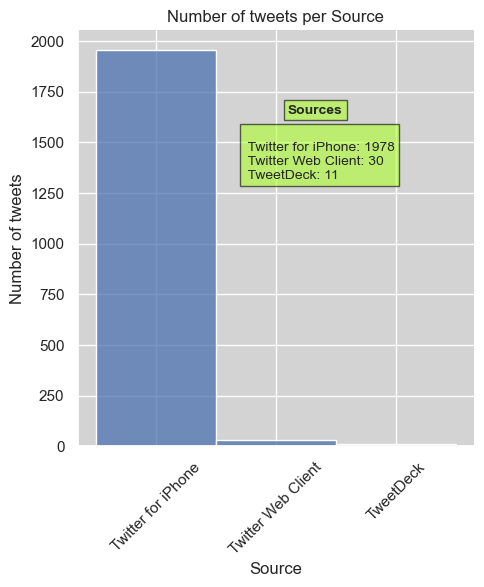

In [302]:
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})
plt.figure(figsize=(5, 6))
sns.displot(data=df, x='source', multiple="stack",kind="hist")
plt.xlabel('Source')
plt.ylabel('Number of tweets')
plt.title(f'Number of tweets per Source')
plt.xticks(rotation=45)

legend_text = ""
for source, count in val_cal.items():
    legend_text+=f'\n {source}: {count}'
legend_bbox = dict(boxstyle='square', facecolor='greenyellow',edgecolor='black', linewidth=1, alpha=0.6)
legend_title = 'Sources'
plt.text(0.53, 0.8, legend_title, transform=plt.gca().transAxes, fontsize='10', fontweight='bold',bbox = legend_bbox)
plt.text(0.42, 0.7, legend_text, transform=plt.gca().transAxes, fontsize='10', va='center', bbox=legend_bbox)


plt.show()

In [303]:
df['retweet_count'].value_counts()

1972    4
819     4
542     4
71      4
748     4
       ..
1626    1
1415    1
1782    1
3357    1
147     1
Name: retweet_count, Length: 1545, dtype: int64

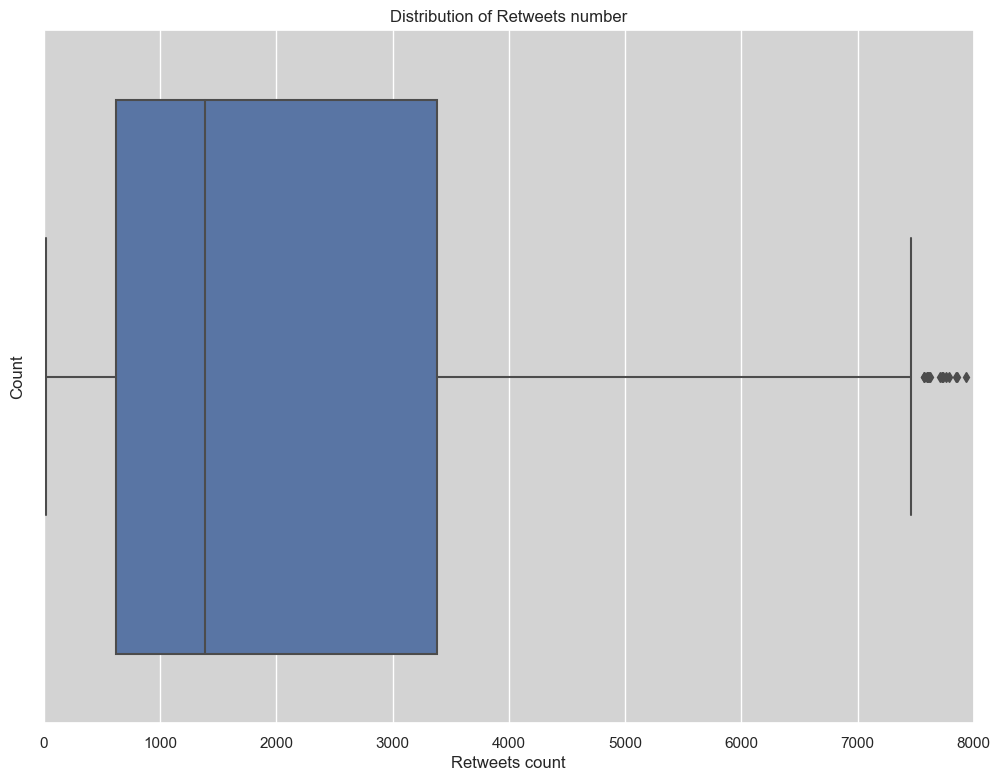

In [304]:
plt.figure(figsize=(12, 9))
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})

sns.boxplot(x=df['retweet_count'])
plt.xlim(0,8000)

plt.ylabel('Count')
plt.xlabel('Retweets count')
plt.title('Distribution of Retweets number')
plt.show()

2. Performing multiple-variable explorations for source and retweet_count columns:

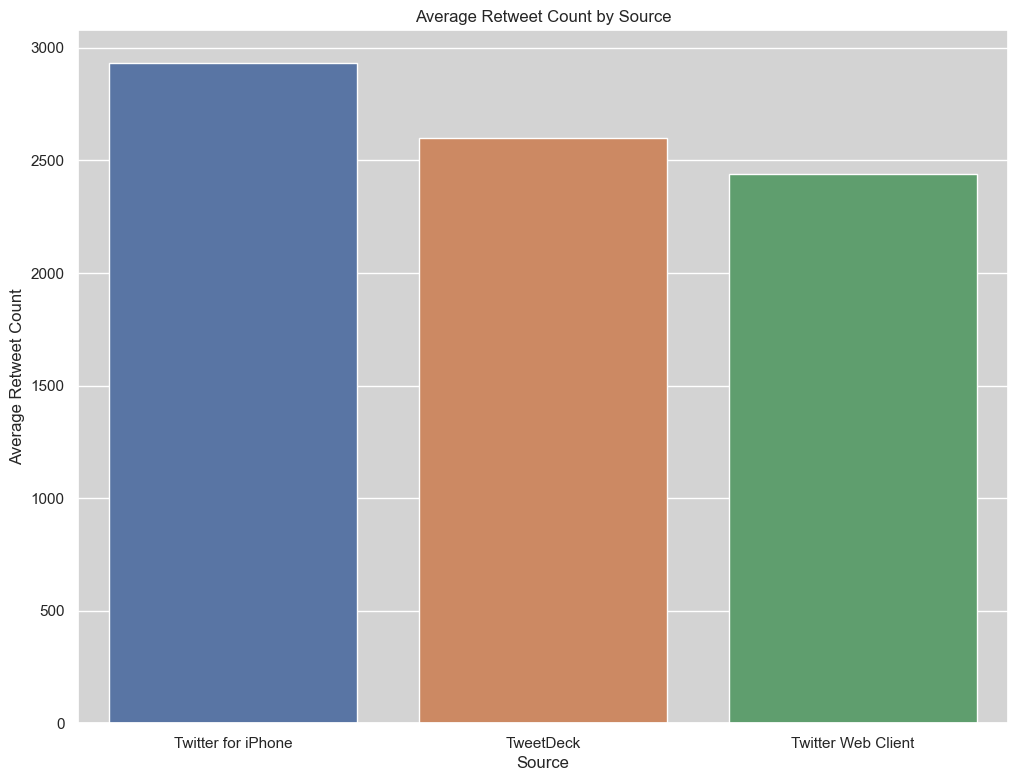

In [305]:
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})
grouped_data_sorted = df.groupby('source')['retweet_count'].mean().reset_index().sort_values('retweet_count', ascending=False)

plt.figure(figsize=(12, 9))
sns.barplot(data=grouped_data_sorted, y='retweet_count', x='source')
plt.ylabel('Average Retweet Count')
plt.xlabel('Source')
plt.title('Average Retweet Count by Source')



plt.show()

### What is the most popular and unpopular dog breeds?

1. Selecting the dog breed using neural network data that can classify breeds of dogs:<br>

**Note:** The confidence level should be higher than 75%, and it should be confirmed that that is a dog

In [306]:
df[((df['p1_dog'] == True) & (df['p1_conf'] >= 0.75))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 537 entries, 10 to 2011
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            537 non-null    int64              
 1   source              537 non-null    object             
 2   timestamp           537 non-null    datetime64[ns, UTC]
 3   rating_numerator    537 non-null    float64            
 4   rating_denominator  537 non-null    Int64              
 5   name                315 non-null    object             
 6   dog_stage           122 non-null    object             
 7   p1                  537 non-null    object             
 8   p1_conf             537 non-null    float64            
 9   p1_dog              537 non-null    bool               
 10  p2                  537 non-null    object             
 11  p2_conf             537 non-null    float64            
 12  p2_dog              537 non-null  

In [307]:
df[((df['p2_dog'] == True) & (df['p2_conf'] >= 0.75))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            0 non-null      int64              
 1   source              0 non-null      object             
 2   timestamp           0 non-null      datetime64[ns, UTC]
 3   rating_numerator    0 non-null      float64            
 4   rating_denominator  0 non-null      Int64              
 5   name                0 non-null      object             
 6   dog_stage           0 non-null      object             
 7   p1                  0 non-null      object             
 8   p1_conf             0 non-null      float64            
 9   p1_dog              0 non-null      bool               
 10  p2                  0 non-null      object             
 11  p2_conf             0 non-null      float64            
 12  p2_dog              0 non-null      bool        

In [308]:
df[((df['p3_dog'] == True) & (df['p3_conf'] >= 0.75))].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 0 entries
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            0 non-null      int64              
 1   source              0 non-null      object             
 2   timestamp           0 non-null      datetime64[ns, UTC]
 3   rating_numerator    0 non-null      float64            
 4   rating_denominator  0 non-null      Int64              
 5   name                0 non-null      object             
 6   dog_stage           0 non-null      object             
 7   p1                  0 non-null      object             
 8   p1_conf             0 non-null      float64            
 9   p1_dog              0 non-null      bool               
 10  p2                  0 non-null      object             
 11  p2_conf             0 non-null      float64            
 12  p2_dog              0 non-null      bool        

In [309]:
df1 = df[((df['p1_dog'] == True) & (df['p1_conf'] >= 0.75))]

In [310]:
df1['p1'].unique()

array(['samoyed', 'pembroke', 'french bulldog', 'golden retriever',
       'basset', 'chihuahua', 'pug', 'blenheim spaniel',
       'labrador retriever', 'malamute', 'chow', 'vizsla',
       'chesapeake bay retriever', 'cardigan', 'shetland sheepdog',
       'komondor', 'black-and-tan coonhound', 'great dane',
       'staffordshire bullterrier', 'schipperke', 'bernese mountain dog',
       'afghan hound', 'brittany spaniel', 'leonberg', 'great pyrenees',
       'norwegian elkhound', 'siberian husky',
       'west highland white terrier', 'pekinese', 'miniature pinscher',
       'bloodhound', 'old english sheepdog', 'briard',
       'american staffordshire terrier', 'german shepherd', 'pomeranian',
       'saint bernard', 'doberman', 'gordon setter', 'rottweiler',
       'kelpie', 'dalmatian', 'beagle', 'toy terrier', 'bull mastiff',
       'flat-coated retriever', 'tibetan mastiff', 'cocker spaniel',
       'collie', 'yorkshire terrier', 'mexican hairless', 'airedale',
       'clumber'

In [311]:
avg_likes= df1['favorite_count'].mean()


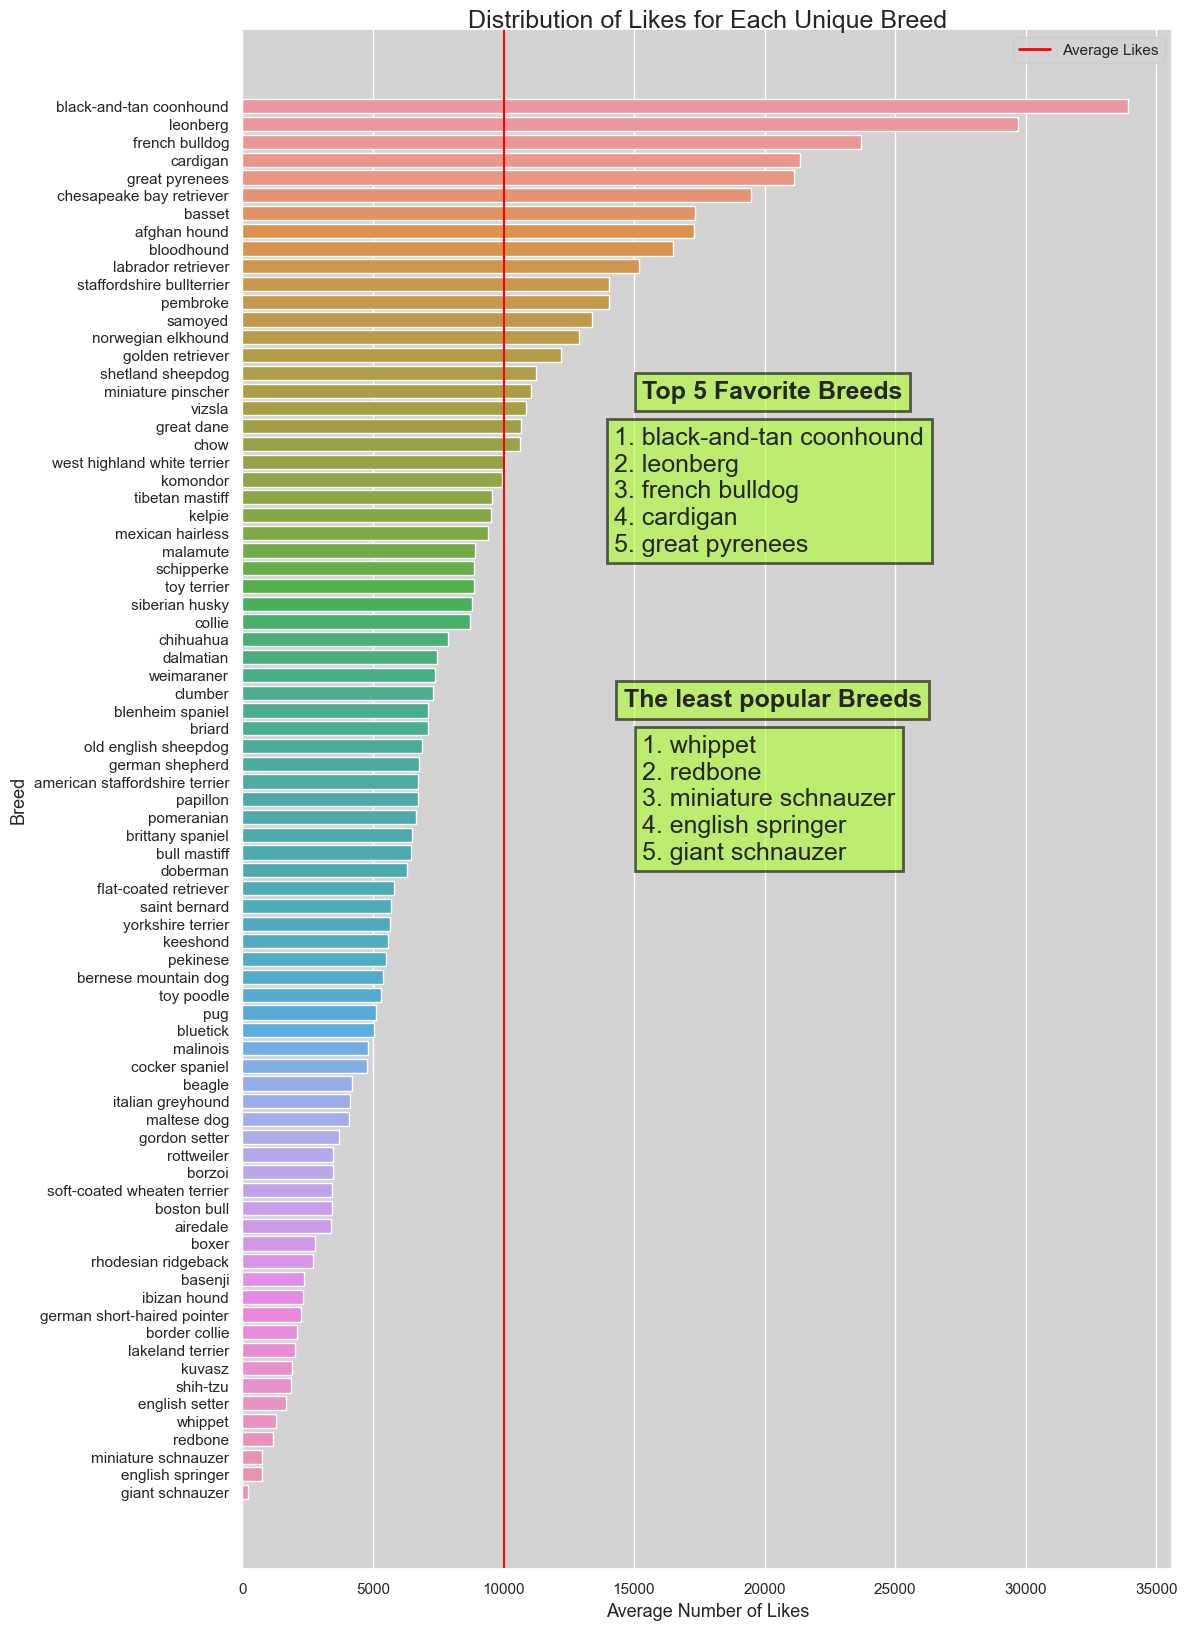

In [312]:
# Sort the grouped data by 'favorite_count' in descending order
grouped_data_sorted = df1.groupby('p1')['favorite_count'].mean().reset_index().sort_values('favorite_count', ascending=False)

# Set the plot style
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})

# Plot the distribution of favorite_count for each unique breed using seaborn
plt.figure(figsize=(12, 20))
sns.barplot(data=grouped_data_sorted, x='favorite_count', y='p1')
plt.axvline(avg_likes,  color ="red")
plt.xlabel('Average Number of Likes',fontsize='13')
plt.ylabel('Breed',fontsize='13')
plt.title('Distribution of Likes for Each Unique Breed', fontsize='18',va='center')

# Print top 5 breeds as legend
top_breeds = grouped_data_sorted['p1'].head(5).tolist()
legend_text = '\n'.join([f'{i+1}. {breed}' for i, breed in enumerate(top_breeds)])
legend_bbox = dict(boxstyle='square', facecolor='greenyellow',edgecolor='black', linewidth=2, alpha=0.6)
legend_title = 'Top 5 Favorite Breeds'
plt.text(0.43, 0.76, legend_title, transform=plt.gca().transAxes, fontsize='18', fontweight='bold',bbox = legend_bbox)
plt.text(0.4, 0.7, legend_text, transform=plt.gca().transAxes, fontsize='18', va='center', bbox=legend_bbox)
#legend for axvline
plt.plot([], [], color='red', label='Average Likes', linewidth=2)
plt.legend(loc='upper right')
# Print  5 Unpopular breeds as legend
top_breeds = grouped_data_sorted['p1'].tail(5).tolist()
legend_text = '\n'.join([f'{i+1}. {breed}' for i, breed in enumerate(top_breeds)])
legend_title = 'The least popular Breeds'
plt.text(0.41, 0.56, legend_title, transform=plt.gca().transAxes, fontsize='18', fontweight='bold',bbox = legend_bbox)
plt.text(0.43, 0.5, legend_text, transform=plt.gca().transAxes, fontsize='18', va='center', bbox=legend_bbox)

plt.xticks(rotation=0)
plt.show()


### What is the most high-rated dog breeds according to WeRateDogs?

1. Using filtered DataFrame plot the graph:

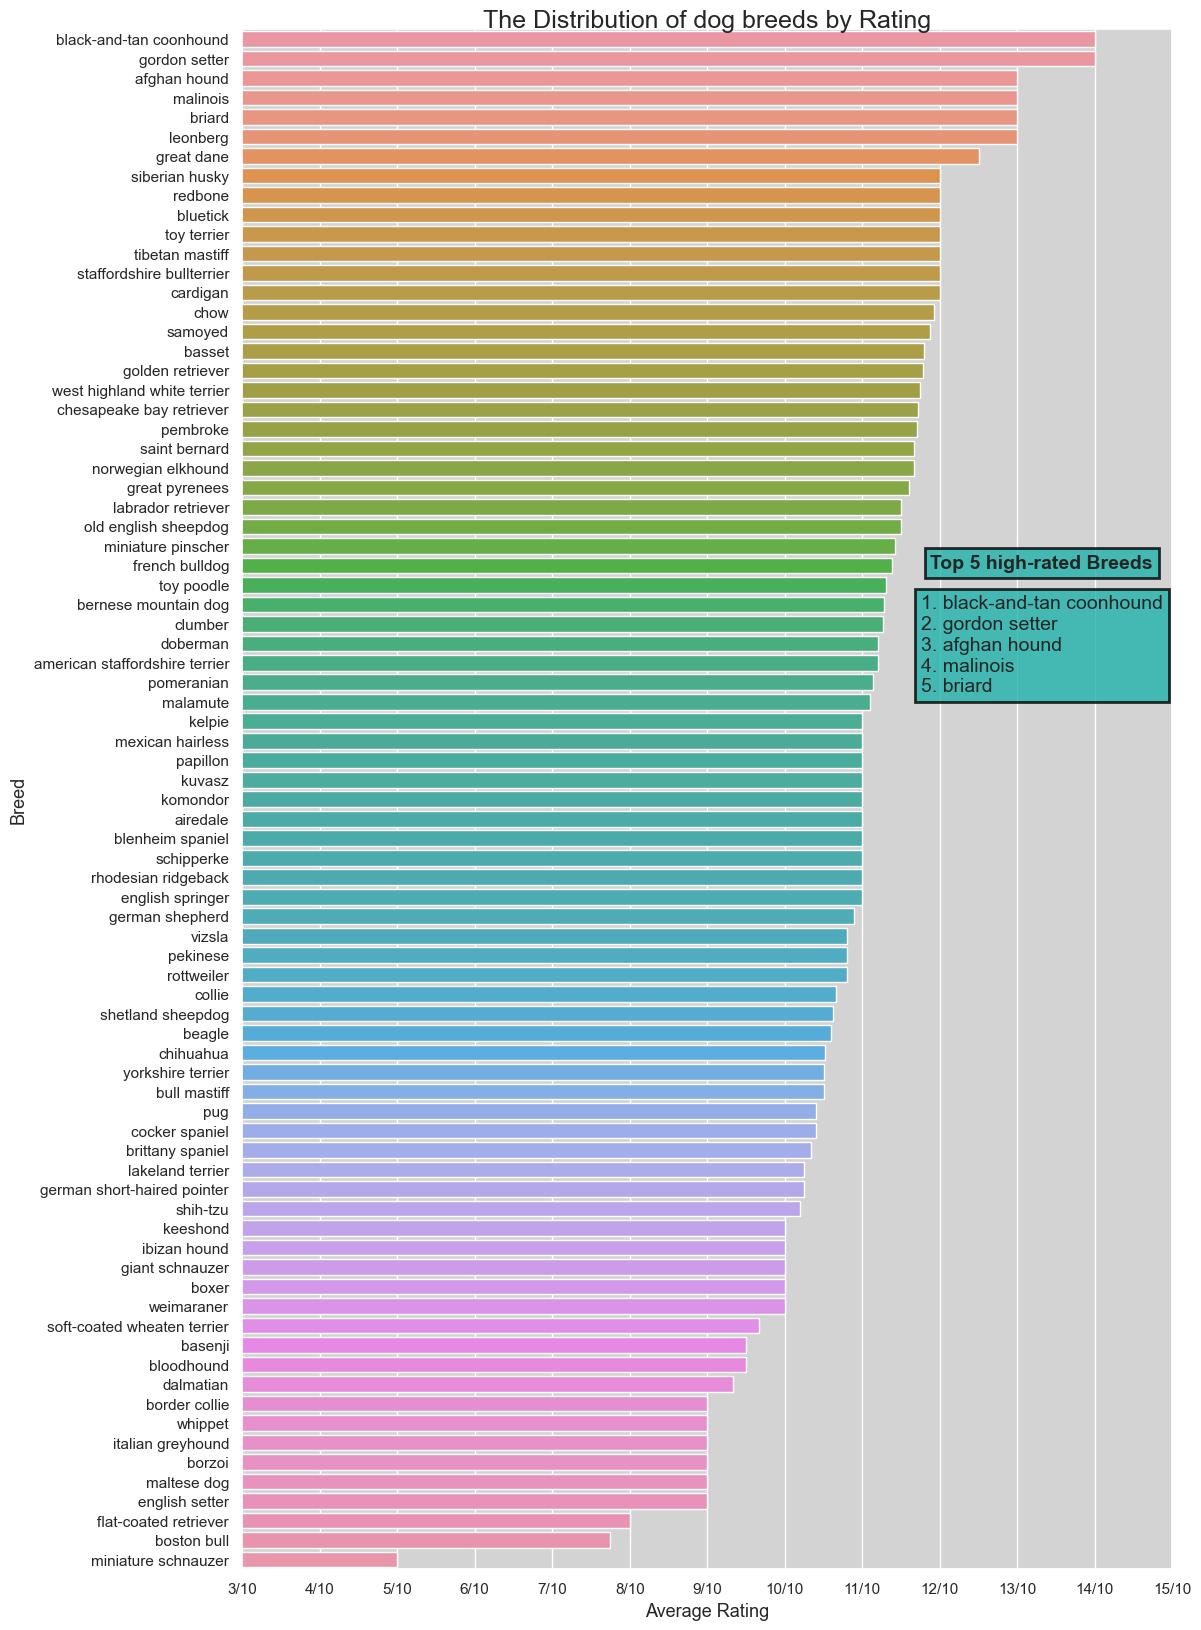

In [313]:
# Sort the grouped data by 'favorite_count' in descending order
grouped_data_sorted = df1.groupby('p1')['rating_numerator'].mean().reset_index().sort_values('rating_numerator', ascending=False)

# Set the plot style
sns.set_style("darkgrid", {"axes.facecolor": "lightgrey"})

# Plot the distribution of favorite_count for each unique breed using seaborn
plt.figure(figsize=(12, 20))
sns.barplot(data=grouped_data_sorted, x='rating_numerator', y='p1')
#plt.axvline(avg_likes,  color ="red")
plt.xlabel('Average Rating',fontsize='13')
plt.ylabel('Breed',fontsize='13')
plt.title('The Distribution of dog breeds by Rating', fontsize='18',va='center')

# Print top 5 breeds as legend
top_breeds = grouped_data_sorted['p1'].head(5).tolist()
legend_text = '\n'.join([f'{i+1}. {breed}' for i, breed in enumerate(top_breeds)])
legend_bbox = dict(boxstyle='square', facecolor='lightseagreen',edgecolor='black', linewidth=2, alpha=0.8)
legend_title = 'Top 5 high-rated Breeds'
plt.text(0.74, 0.65, legend_title, transform=plt.gca().transAxes, fontsize='14', fontweight='bold',bbox = legend_bbox)
plt.text(0.73, 0.6, legend_text, transform=plt.gca().transAxes, fontsize='14', va='center', bbox=legend_bbox)
#legend for axvline
#plt.plot([], [], color='red', label='Average rating', linewidth=2)
#plt.legend(loc='upper right')
plt.xlim(3,15)
plt.xticks(np.arange(3, 16, 1), [f'{x}/10' for x in np.arange(3, 16, 1)])

plt.xticks(rotation=0)
plt.show()

## Resources

https://pypi.org/project/requests/<br>
https://docs.tweepy.org/en/stable/<br>
https://jupyterbook.org/en/stable/interactive/hiding.html#:~:text=will%20be%20displayed.-,Hide%20cell%20inputs,cell%20but%20display%20the%20outputs.<br>
https://docs.python.org/3/library/re.html<br>
https://www.dogzone.com/breeds/gordon-setter/<br>
https://matplotlib.org/2.0.2/mpl_examples/color/named_colors.pdf